# Mahalanobis distance outlier method for multivariate data  

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
import matplotlib.pyplot as plt

def generate_multivariate_data(start_date='2023-01-01', end_date='2023-12-31', freq='D'):
    date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)

    data_field1 = np.random.normal(loc=0, scale=1, size=len(date_rng))
    data_field1[210:270] += 50
    data_field2 = np.random.normal(loc=0, scale=1, size=len(date_rng))
    data_field2[200:250] += 10
    data_field3 = np.random.normal(loc=0, scale=1, size=len(date_rng))

    multivariate_data = np.column_stack((data_field1, data_field2, data_field3))
    
    return pd.DataFrame(multivariate_data, columns=['A', 'B', 'C'], index=date_rng)

df_multivariate = generate_multivariate_data()
print(df_multivariate)


                   A         B         C
2023-01-01  0.999733  0.381034 -0.998994
2023-01-02  1.684563  0.175301 -0.175419
2023-01-03  1.394404 -0.516689 -1.760760
2023-01-04  1.143062 -0.504846 -0.847974
2023-01-05 -0.968065 -0.130394 -0.847874
...              ...       ...       ...
2023-12-27 -1.993934 -0.679463 -0.012958
2023-12-28 -0.091189 -1.095087  1.209997
2023-12-29  0.494818  0.836510 -1.058835
2023-12-30  0.389643 -0.682019 -1.240430
2023-12-31  0.248804  0.194163  1.702664

[365 rows x 3 columns]


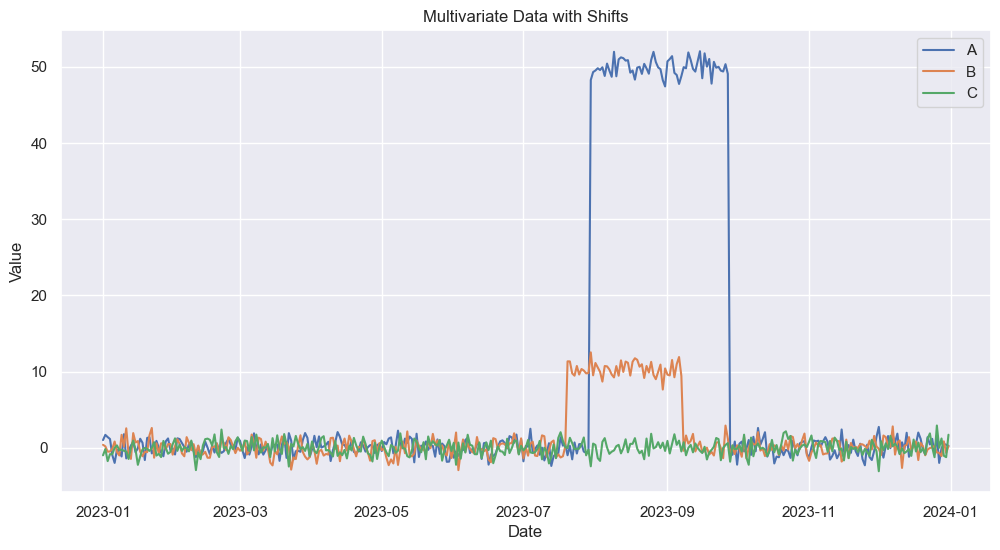

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="darkgrid")

# Plot the multivariate data
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_multivariate, dashes=False)


plt.title('Multivariate Data with Shifts')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


# Detect outliers in multivariate data using Mahalanobis Distance

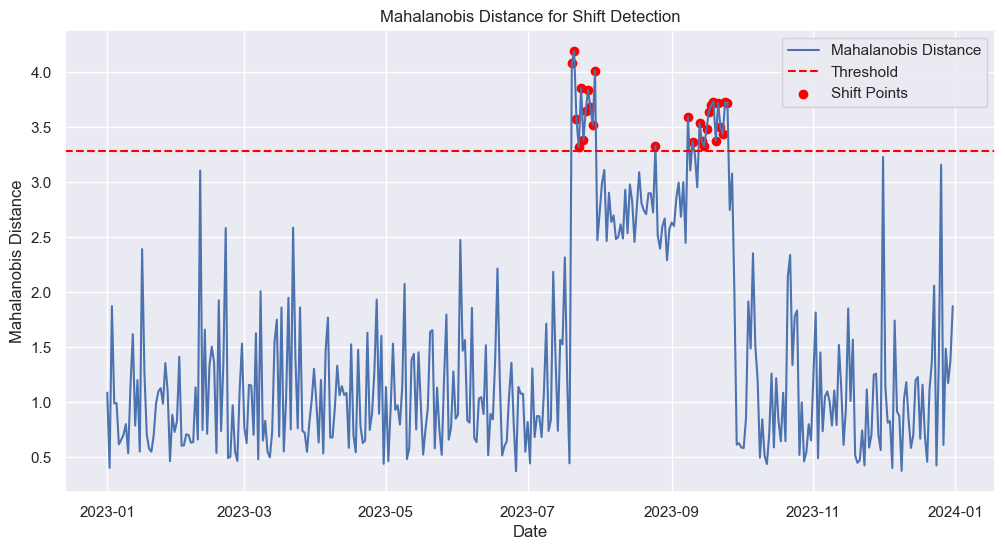

In [3]:
mean_vector = df_multivariate.mean().values

covariance_matrix = df_multivariate.cov().values

covariance_matrix_inv = np.linalg.inv(covariance_matrix)

mahalanobis_distance = np.array([np.sqrt((x - mean_vector).T.dot(covariance_matrix_inv).dot(x - mean_vector)) for x in df_multivariate.values])

alpha = 0.65

threshold = chi2.ppf(alpha, df=len(df_multivariate.columns))

shift_points = np.where(mahalanobis_distance > threshold)[0]

plt.figure(figsize=(12, 6))
plt.plot(df_multivariate.index, mahalanobis_distance, label='Mahalanobis Distance')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.scatter(df_multivariate.index[shift_points], mahalanobis_distance[shift_points], color='red', label='Shift Points')
plt.title('Mahalanobis Distance for Shift Detection')
plt.xlabel('Date')
plt.ylabel('Mahalanobis Distance')
plt.legend()
plt.show()
